<a href="https://colab.research.google.com/github/kidusabe1/GRU-Vs-LSTM-for-Emotion-Prediction-using-EEG-Data/blob/main/GRU_Vs_LSTM_for_Emotion_Prediction_using_EEG_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report


In [4]:
data = pd.read_csv("/content/emotions.csv")

In [5]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


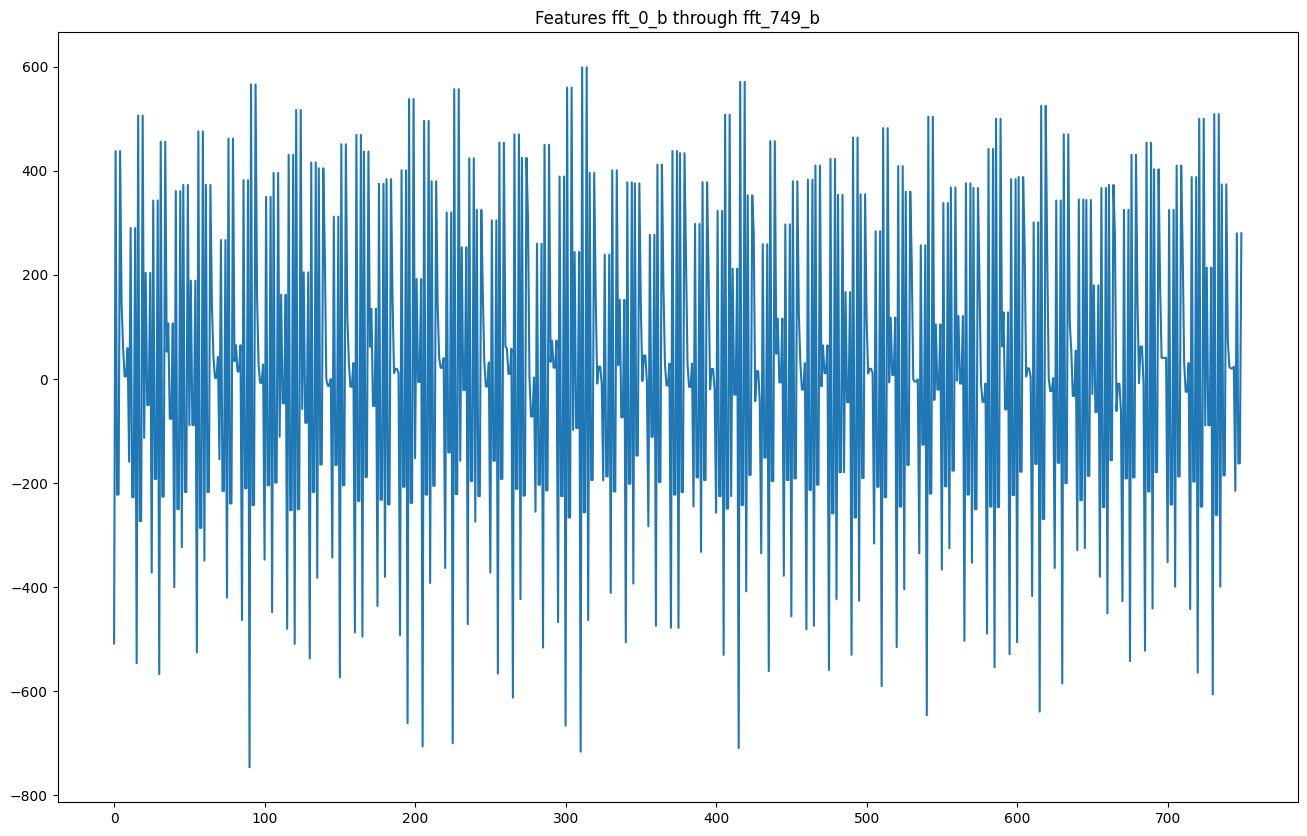

In [6]:
sample =  data.loc[0,'fft_0_b':'fft_749_b']

plt.figure(figsize=(16,10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [7]:
data['label'].value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


In [8]:
label_mapping = {'NEGATIVE':0, 'NEUTRAL':1,'POSITIVE':2}

#PREPROCESSING

In [9]:
def preprocess_inputs(df):
  df = df.copy()
  df['label'] = df['label'].replace(label_mapping)

  y = df['label'].copy()
  x = df.drop('label',axis=1).copy()

  x_train, x_test, y_train, y_test =  train_test_split(x,y,train_size = 0.7, random_state = 123)

  return x_train, x_test, y_train, y_test

In [21]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

<ipython-input-9-69ed2790a7dc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [11]:
x_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


# Model Definition
## LSTM

In [12]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(lstm)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 2548, 256)           │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,221,059 (8.47 MB)

 Trainable params: 2,221,059 (8.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 50,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.7068 - loss: 12.8413 - val_accuracy: 0.8930 - val_loss: 3.7832
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9528 - loss: 1.1114 - val_accuracy: 0.8963 - val_loss: 4.8463
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9624 - loss: 0.8749 - val_accuracy: 0.9097 - val_loss: 2.2320
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9413 - loss: 1.4862 - val_accuracy: 0.9565 - val_loss: 1.4595
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9921 - loss: 0.0927 - val_accuracy: 0.9465 - val_loss: 1.8495
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9796 - loss: 0.6486 - val_accuracy: 0.9365 - val_loss: 2.8558
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9881 - loss: 0.1547 - val_accuracy: 0.9699 - val_loss: 0.7013
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9918 - loss: 0.1282 - val_accuracy: 

## Evaluation


In [15]:
model_acc = model.evaluate(x_test, y_test, verbose = 0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc*100))

Test Accuracy: 97.500%


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


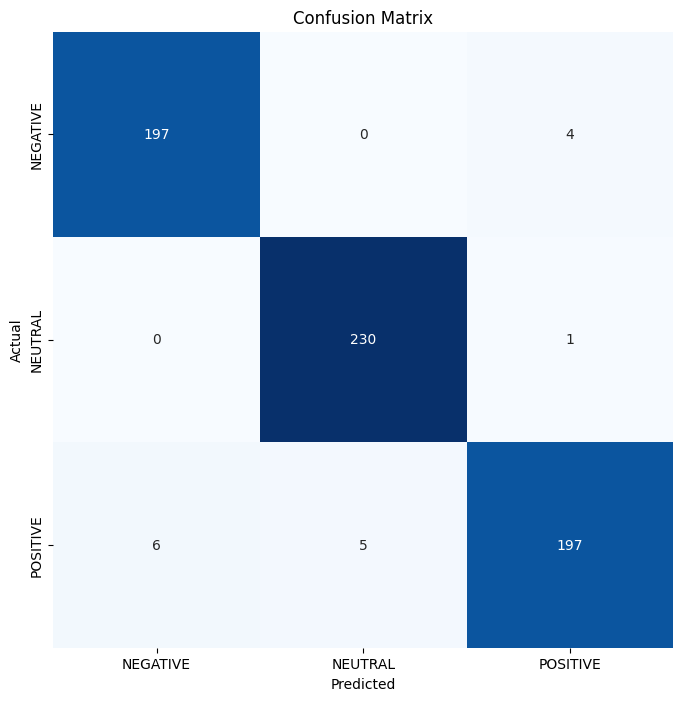

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.98      0.98       201
     NEUTRAL       0.98      1.00      0.99       231
    POSITIVE       0.98      0.95      0.96       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [17]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# GRU

In [20]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

expand_dims_g = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

GRU = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims_g)

flatten = tf.keras.layers.Flatten()(GRU)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model_g = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model_g.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_3 (Lambda)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
model_g.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_g.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6937 - loss: 51.7826 - val_accuracy: 0.8763 - val_loss: 20.5537
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.8971 - loss: 7.3867 - val_accuracy: 0.9231 - val_loss: 3.2117
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9184 - loss: 4.6455 - val_accuracy: 0.8462 - val_loss: 39.1430
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9222 - loss: 9.9522 - val_accuracy: 0.9732 - val_loss: 1.1929
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9794 - loss: 0.8746 - val_accuracy: 0.9264 - val_loss: 8.1642
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9651 - loss: 1.7147 - val_accuracy: 0.9398 - val_loss: 7.3669
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9907 - loss: 0.9973 - val_accuracy: 0.9365 - val_loss: 6.1570
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9932 - loss: 0.1293 - val_accuracy:

## Evaluation

In [24]:
model_g_acc = model_g.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_g_acc * 100))

Test Accuracy: 96.406%


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


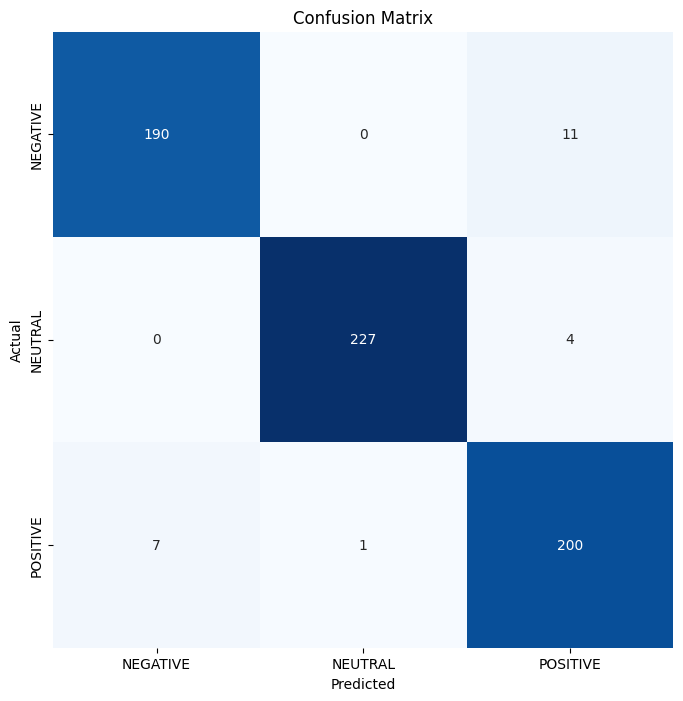

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.95      0.95       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.93      0.96      0.95       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [25]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model_g.predict(x_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)